In [6]:
import tweepy
import csv #Import csv

with open('../credentials.txt', 'r') as credentials:
    credentials.readline()
    api_key = credentials.readline().rstrip()
    api_key_secret = credentials.readline().rstrip()
    credentials.readline()
    access_token = credentials.readline().rstrip()
    access_token_secret = credentials.readline().rstrip()

In [7]:
auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [70]:
# Open/create a file to append data to
csvFile = open('../dataset/raw_dataset.csv', 'a', encoding="UTF-8")

#Use csv writer
csvWriter = csv.writer(csvFile)

tweets = []
ratios = []

for tweet in tweepy.Cursor(api.search,
                           q = "from:FoodizShare AND -filter:retweets AND -filter:replies",
                           until='2020-09-09',
                           tweet_mode='extended').items():

    tweets.append(tweet)

    if tweet.user.followers_count == 0:
        continue

    ratio = (tweet.retweet_count) / tweet.user.followers_count
    ratios.append(ratio)

    # Write a row to the CSV file. I use UTF-8 encoding
    csvWriter.writerow([tweet.user.screen_name, tweet.created_at, tweet.full_text,tweet.retweet_count, ratio])
csvFile.close()

In [71]:
len(tweets)

7

In [72]:
date = []
retweet_count = []

for tweet in tweets:
    print(tweet.created_at, tweet.retweet_count)
    date.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    

2020-09-08 06:28:31 17
2020-09-07 08:48:27 17
2020-09-06 08:54:18 17
2020-09-05 05:36:47 15
2020-09-04 06:41:26 21
2020-09-03 06:22:40 22
2020-09-01 07:04:21 35


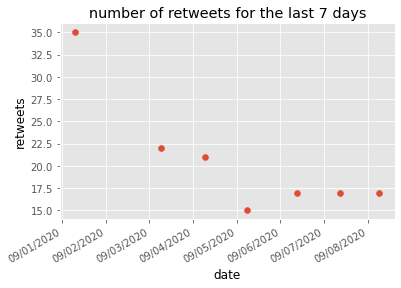

In [73]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.xlabel('date', color='black')
plt.ylabel('retweets', color='black')
plt.title('number of retweets for the last 7 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(date,retweet_count)
plt.gcf().autofmt_xdate()